In [1]:
from mavis import *
# print(gpulib)
mp.set_start_method('forkserver')
#mp.set_start_method('spawn')

In [2]:
xx, yy = np.linspace(-15,15,10), np.linspace(-15,15,10)
cartPointingCoords =  np.dstack(np.meshgrid(xx, yy)).reshape(-1, 2)
NGS_flux = [10000, 30000, 5000]
NGS_SR_1650 = [0.4, 0.2, 0.6]
NGS_FWHM_mas = [90, 110, 85]
polarNGSCoords = np.asarray([[30.0,0.0], [50.0,100.0],[10.0,240.0]])
#polarNGSCoords = np.asarray([[10.0,0.0], [10.0,120.0],[10.0,240.0]])
cartNGSCoords = np.asarray([polarToCartesian(polarNGSCoords[0,:]), polarToCartesian(polarNGSCoords[1,:]), polarToCartesian(polarNGSCoords[2,:])])
mLO = MavisLO("/home/frossi/dev/MASTSEL/", 'mavisParams')

In [3]:
%%time
Ctot = mLO.computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas, True)
# print('Ctot', Ctot)
#Ctot [[[18545.18136324  3308.78460439]
#  [ 3308.78460439 20872.5522838 ]]
# [[28.59791617 -3.8054102  35.15831592 -1.7180003  46.33356834 -0.51767148]
#  [-3.8054102  38.74567669 -1.7180003  17.85779335 -0.51767148 46.82192702]]

CPU times: user 3.12 s, sys: 824 ms, total: 3.94 s
Wall time: 3.95 s


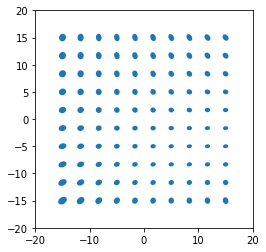

In [4]:
%matplotlib inline
cov_ellipses = mLO.ellipsesFromCovMats(Ctot)
plotEllipses(cartPointingCoords, cov_ellipses, 0.2)

In [5]:
#%%time
cartNGSCoords = np.asarray([polarToCartesian(polarNGSCoords[0,:]), polarToCartesian(polarNGSCoords[1,:]), polarToCartesian(polarNGSCoords[2,:])])
Ctot = computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas, True)
print('Ctot', Ctot)
Ctot = np.asarray(Ctot)
cov_ellipses = ellipsesFromCovMats(Ctot)

Ctot [[[18545.1848659   3308.79937823]
  [ 3308.79937823 20872.57842263]]]


In [6]:
scale =1.0
print(0.5 * np.arctan( 2*-2405.86006388 / ( 12145.83654855-14191.5529846 )))
print(np.sqrt( 0.5 * ( 2*-2405.86006388 / np.sin(2*0.5843981184677838) + 12145.83654855+14191.5529846) ) / scale)
print( np.sqrt(12145.83654855+14191.5529846-10554.42592401998)/scale )
# manca conversione da nanometri a mas:


0.5843981184677838
102.73473572273393
125.63026549812757


In [7]:
%%timeit
Ctot = computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)

3.23 s ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
